In [5]:
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import xhermes
import re

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.solps_pp import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


In [ ]:
db = CaseDB()

toload = [ 
    dict(name="hiresbase", id="d40de-no_condfluxlim", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="base", id="hn2d1i-AFN_nocondlim_widev2", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="hotneut", id="hn4d-hnthresh_0_widev2_AFN", unnormalise_geom = True, use_xhermes = True, squash = True), 
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)


- Reading case d40de-no_condfluxlim
-----------------------
- Looking for squash file
- Squash file found. squash date 04/22/2024, 15:43:47, dmp file date 04/22/2024, 11:47:38

Unnormalising with xHermes
- Reading case hn2d1i-AFN_nocondlim_widev2
-----------------------
- Looking for squash file
- Squash file found. squash date 04/22/2024, 16:10:51, dmp file date 04/22/2024, 15:44:58


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1134: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case hn4d-hnthresh_0_widev2_AFN
-----------------------
- Looking for squash file
- Squash file found. squash date 04/22/2024, 19:35:30, dmp file date 04/22/2024, 19:26:04


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1134: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes


# SOLEDGE2D

In [ ]:
soledgecases = {
    "tightwall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_1e19"), # Hermes-3 like wall
    "tightwall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19"), # Hermes-3 like wall
    "widewall_2e19_5m" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19_5M"),
    "tightwall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_3e19"), # Hermes-3 like wall
    "widewall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_1e19"), 
    "widewall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19"), 
    "widewall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_3e19"), 
}

sl = dict()

for name in soledgecases:
    path = soledgecases[name]
    sl[name] = SOLEDGEdata(path = path)
    sl[name].read_csv(os.path.join(path, "omp_plasma.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "omp_neutrals.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "imp_plasma.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "imp_neutrals.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "wall_ntmpi_plasma.csv"), mode = "wall_ntmpi")



c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astyp

# Read SOLPS

In [ ]:
solpscases = {
    # "base" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5"),
    "noiz_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16"),
    # "gammai_2.5" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00"),
    # "dpuff_1e22" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22"),
    # "dpuff_5e21" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=5.0E+21"),
    # "no_fast_reflec" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0"),
    # "nsep_2e19" : os.path.join(onedrive_path,r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=2E+19"),
    # "nsep_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=3E+19"),
    # "narrow_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent"),
    # "no_visc" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent.b2tqca_phm0=0"),
    # "16x_mc" : os.path.join(onedrive_path, r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.xxx.BCCON=16.core_extent.MC.histories.x16-ish.NOT.converged"),
    "tightwall_2e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=2.0E+19",
    "tightwall_noD2_1e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=1.0E+19.NO.D2",
    "tightwall_noD2_2e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=2.0E+19.NO.D2",
    "tightwall_noD2_3e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=3.0E+19.NO.D2",
    
}

sp = dict()

for name in solpscases:
    sp[name] = SOLPSdata()
    # sp[name].read_last10s(solpscases[name])
    sp[name].read_from_case(solpscases[name])

# SOLPS wall balances

In [ ]:

path = os.path.join(onedrive_path, r"Project\collab\From\Matteo\2023-03-08 - Display tallies ppt\display_tallies.csv")
solps = read_display_tallies(path)

solps["xreg"].loc["fhtxreg"]

# SOLEDGE2D wall balances

In [ ]:
plt.close("all")

self = SOLEDGEcase(soledgecases["tightwall_2e19"])
slcWfluxes = self.get_wall_flux_summary()


c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


get_wall_triangle
get_wall_triangles
get_wall_triangles.2: Completed
get_wall_triangle: Completed

 ********** 
 **********
get_wall_triangle
get_wall_triangles
get_wall_triangles.2: Completed
get_wall_triangle: Completed


In [ ]:
[print(x) for x in ds.data_vars if "pf" in x]

[]

In [ ]:
for case in cs:
    cs[case].ds = calculate_radial_fluxes(cs[case].ds)

In [ ]:
ds.data_vars

Data variables:
    Bxy                     (x, theta) float64 dask.array<chunksize=(20, 58), meta=np.ndarray>
    Dnnd                    (x, theta) float64 dask.array<chunksize=(20, 58), meta=np.ndarray>
    Ed+_rec                 (x, theta) float64 dask.array<chunksize=(20, 58), meta=np.ndarray>
    Ed_pump                 (x, theta) float64 dask.array<chunksize=(20, 58), meta=np.ndarray>
    Ed_target_recycle       (x, theta) float64 dask.array<chunksize=(20, 58), meta=np.ndarray>
    Ed_target_refl          (x, theta) float64 dask.array<chunksize=(20, 58), meta=np.ndarray>
    Ed_wall_recycle         (x, theta) float64 dask.array<chunksize=(20, 58), meta=np.ndarray>
    Ed_wall_refl            (x, theta) float64 dask.array<chunksize=(20, 58), meta=np.ndarray>
    Edd+_cx                 (x, theta) float64 dask.array<chunksize=(20, 58), meta=np.ndarray>
    Edd+_iz                 (x, theta) float64 dask.array<chunksize=(20, 58), meta=np.ndarray>
    EnergyFlow_d+_xlow      (x, th

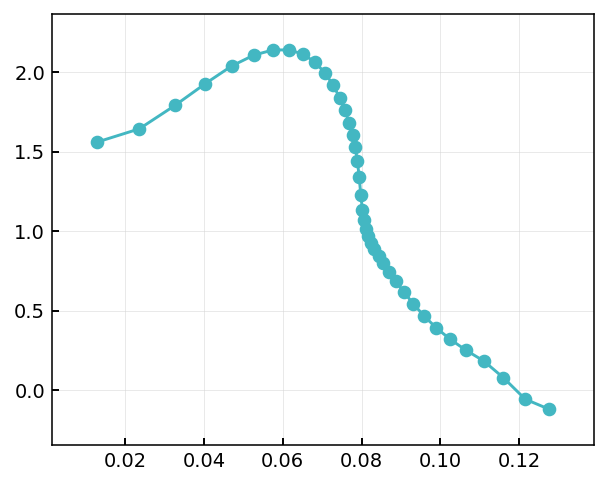

In [ ]:
ds = cs["hiresbase"].ds.isel(t=-1)

reg = ds.hermesm.select_region("outer_midplane_a")
x = np.cumsum(reg["dr"])

fig, ax = plt.subplots()

ax.plot(x, np.gradient(reg["Pd"], x), marker = "o")


In [ ]:
calculate_neutral_heat_balance(cs["hiresbase"].ds.isel(t=-1), mode = "reflection")

,outer_wall,inner_wall,targets,pfr
d,0.170364,0.021791,0.057204,0.151985
d*,NaN,NaN,NaN,NaN
total,0.170364,0.021791,0.057204,0.151985


In [ ]:
ds = cs["hiresbase"].ds.isel(t=-1)
df = pd.DataFrame()


def get_sum(param, loc = None):
    # ds = cs["base"].ds.isel(t=-1)
    
    if param in ds.data_vars:
        
        data = ds[param].hermesm.clean_guards()
        dv = ds["dv"]
        if loc != None:
            data = data.hermesm.select_region(loc)
            dv = ds.hermesm.select_region(loc)["dv"]
            
        val = (data * dv).sum(["x", "theta"]) * 1e-6
        
        if any([x in param for x in ["iz", "rec"]]):
            val *= -1
        return val
    else:
        return np.nan
    
def get_bndry_flux(species, boundary, type = "convection"):
    if "core" in boundary:
        LR = "L"
    elif "sol" in boundary:
        LR = "R"
    else:
        raise Exception(f"{boundary} not implemented")
        
    if type == "convection":
        param = f"hf_perp_conv_{LR}_{species}"
        scale = 1e-6
    else:
        raise Exception(f"{type} not implemented")
        
    if param in ds.data_vars:
        return ds.hermesm.select_region("core_edge")[param].sum("theta").values * 1e-6
    else:
        print(f"Warning: {param} not found in dataset")
        return np.nan
    
df.loc["target_refl", "d"] = get_sum("Ed_target_refl")
df.loc["inner_sol_refl", "d"] = get_sum("Ed_wall_refl", loc = "inner_sol_edge")
df.loc["outer_sol_refl", "d"] = get_sum("Ed_wall_refl", loc = "outer_sol_edge")
df.loc["pfr_refl", "d"] = get_sum("Ed_wall_refl", loc = "pfr_edge")
df.loc["target_trefl", "d"] = get_sum("Edd*_target_refl")
df.loc["wall_trefl", "d"] = get_sum("Edd*_wall_refl")
df.loc["target_recycle", "d"] = get_sum("Ed_target_recycle") * -1
df.loc["wall_recycle", "d"] = get_sum("Ed_wall_recycle") * -1
df.loc["core_escape", "d"] = get_bndry_flux("d", "core_edge", type = "convection")
df.loc["sol_escape", "d"] = get_bndry_flux("d", "sol_edge", type = "convection")
df.loc["iz", "d"] = get_sum("Edd+_iz")
df.loc["rec", "d"] = get_sum("Ed+_rec")
df.loc["cx", "d"] = get_sum("Edd+_cx")
df.loc["cxt", "d"] = get_sum("Edd+_cxt")
df.loc["src", "d"] = get_sum("Pd_src") * 3/2

df.loc["target_refl", "d*"] = get_sum("Ed*_target_refl")
df.loc["inner_sol_refl", "d*"] = get_sum("Ed*_wall_refl", loc = "inner_sol_edge")
df.loc["outer_sol_refl", "d*"] = get_sum("Ed*_wall_refl", loc = "outer_sol_edge")
df.loc["pfr_refl", "d*"] = get_sum("Ed*_wall_refl", loc = "pfr_edge")
df.loc["target_trefl", "d*"] = get_sum("Edd*_target_refl") * -1
df.loc["wall_trefl", "d*"] = get_sum("Edd*_wall_refl") * -1
df.loc["target_recycle", "d*"] = get_sum("Ed*_target_recycle")
df.loc["wall_recycle", "d*"] = get_sum("Ed*_wall_recycle")
df.loc["core_escape", "d*"] = get_bndry_flux("d*", "core_edge", type = "convection")
df.loc["sol_escape", "d*"] = get_bndry_flux("d*", "sol_edge", type = "convection")
df.loc["iz", "d*"] = get_sum("Ed*d+_iz")
df.loc["rec", "d*"] = get_sum("Ed*d+_rec")
df.loc["cx", "d*"] = get_sum("Ed*d+_cx")
df.loc["cxt", "d*"] = get_sum("Ed*d+_cxt")

df.loc["TOTAL BALANCE", :] = df[~df.index.isin(["target_trefl", "wall_trefl"])].sum(axis=0)

df

,d,d*
target_refl,-0.057204,NaN
inner_sol_refl,-0.021791,NaN
outer_sol_refl,-0.170364,NaN
pfr_refl,-0.151985,NaN
target_trefl,NaN,NaN
wall_trefl,NaN,NaN
target_recycle,0.374705,NaN
wall_recycle,0.000177,NaN
core_escape,-0.091137,NaN
sol_escape,-0.112596,NaN


In [ ]:
dfrefl = df.transpose()[["outer_sol_refl", "inner_sol_refl", "target_refl", "pfr_refl"]].copy()
dfrefl = dfrefl.rename(columns = {"outer_sol_refl" : "outer_wall", "inner_sol_refl" : "inner_wall", "target_refl" : "targets", "pfr_refl" : "pfr"})
dfrefl.loc["total", :] = dfrefl.sum(axis=0)
dfrefl *= -1
display(dfrefl.style.format("{:.3f}"))

,outer_wall,inner_wall,targets,pfr
d,0.171,0.023,0.050,0.160
d*,nan,nan,nan,nan
total,0.171,0.023,0.050,0.160


In [ ]:
path = os.path.join(onedrive_path, r"Project\collab\From\Matteo\2023-03-08 - Display tallies ppt\display_tallies.csv")
solps = read_display_tallies(path)

,outer_wall,inner_wall,targets,pfr
E_Total,0.232,0.039,1.266,0.103
E_incident_Electron,0.000,0.000,0.554,0.000
E_incident_Ions,0.000,0.000,0.963,0.001
E_incident_Atoms,0.210,0.026,0.071,0.082
E_incident_Molecules,0.000,0.000,0.000,0.000
E_Radiation,0.021,0.012,0.019,0.019
E_Radiation_Atoms,0.021,0.012,0.019,0.019
E_Rad_Recombination,0.000,0.000,-0.452,-0.001
E_Recombination_in_Wall,0.001,0.000,0.110,0.001
